Classification project

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

* obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
* alpha = Right Ascension angle (at J2000 epoch)
* delta = Declination angle (at J2000 epoch)
* u = Ultraviolet filter in the photometric system
* g = Green filter in the photometric system
* r = Red filter in the photometric system
* i = Near Infrared filter in the photometric system
* z = Infrared filter in the photometric system
* run_ID = Run Number used to identify the specific scan
* rereun_ID = Rerun Number to specify how the image was processed
* cam_col = Camera column to identify the scanline within the run
* field_ID = Field number to identify each field
* spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
* class = object class (galaxy, star or quasar object)
* redshift = redshift value based on the increase in wavelength
* plate = plate ID, identifies each plate in SDSS
* MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

I have split the data into training(80%) and test(20%) sets
The training data consists of 16 features. I have excluded the rerun_ID feature.

Dataset link=[Kaggle](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download)

#Build data


I have uploaded the csv file into my google drive, for someone else to run the code you need to either upload it to your google drive , or to modify the code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/star_classification.csv')

In [ ]:
print(df)

             obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      

In [ ]:
features=['obg_ID','alpha','delta','u','g','r','i','z','run_ID','cam_col','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID']

In [ ]:
import numpy as np

data = np.genfromtxt('/content/drive/MyDrive/star_classification.csv', delimiter=',', skip_header=1,dtype=str)
print(data[0])

['1237660961327743232' '135.6891066036' '32.4946318397087' '23.87882'
 '22.2753' '20.39501' '19.16573' '18.79371' '3606' '301' '2' '79'
 '6543777369295181824' '"GALAXY"' '0.6347936' '5812' '56354' '171']


In [ ]:
y=data[:,13]

x = np.delete(data, [9, 13], axis=1)
x=x.astype(float)
print(x,y)

[[1.23766096e+18 1.35689107e+02 3.24946318e+01 ... 5.81200000e+03
  5.63540000e+04 1.71000000e+02]
 [1.23766488e+18 1.44826101e+02 3.12741849e+01 ... 1.04450000e+04
  5.81580000e+04 4.27000000e+02]
 [1.23766096e+18 1.42188790e+02 3.55824442e+01 ... 4.57600000e+03
  5.55920000e+04 2.99000000e+02]
 ...
 [1.23766830e+18 2.24587407e+02 1.57007074e+01 ... 2.76400000e+03
  5.45350000e+04 7.40000000e+01]
 [1.23766115e+18 2.12268621e+02 4.66603653e+01 ... 6.75100000e+03
  5.63680000e+04 4.70000000e+02]
 [1.23766115e+18 1.96896053e+02 4.94646428e+01 ... 7.41000000e+03
  5.71040000e+04 8.51000000e+02]] ['"GALAXY"' '"GALAXY"' '"GALAXY"' ... '"GALAXY"' '"GALAXY"' '"GALAXY"']


In [ ]:
unique_values, indices = np.unique(y, return_inverse=True)
mapped_values = np.searchsorted(unique_values, y)
print(mapped_values)

[0 0 0 ... 0 0 0]


Final data

In [ ]:
x_train=x[:80000]
x_test=x[80000:]
y_train=mapped_values[:80000]
y_test=mapped_values[80000:]

In [ ]:
import matplotlib.pyplot as plt

#Plots

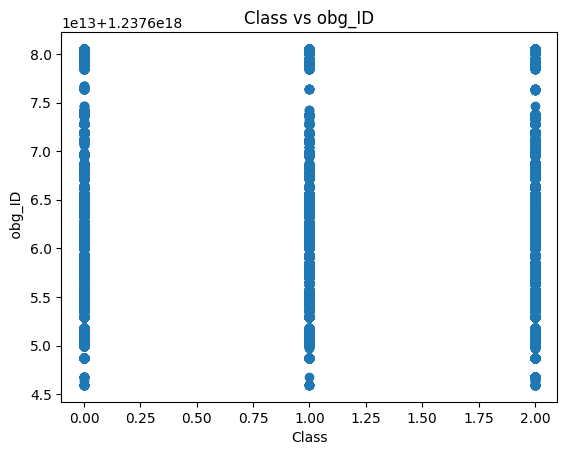

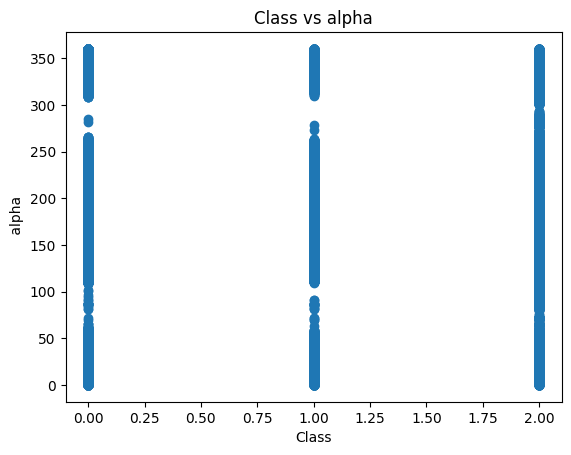

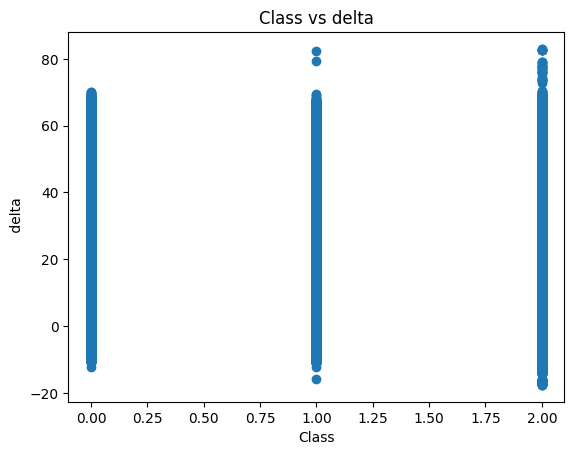

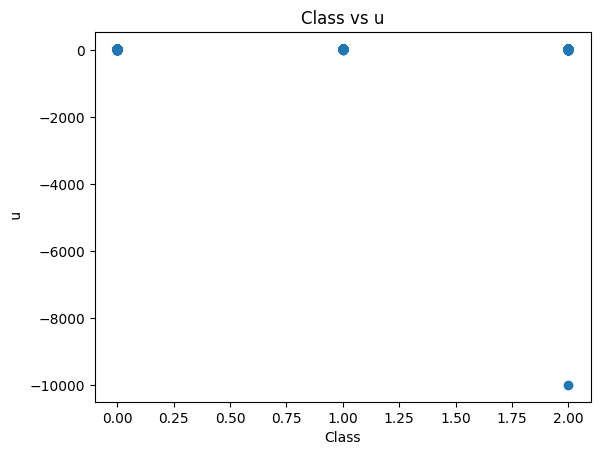

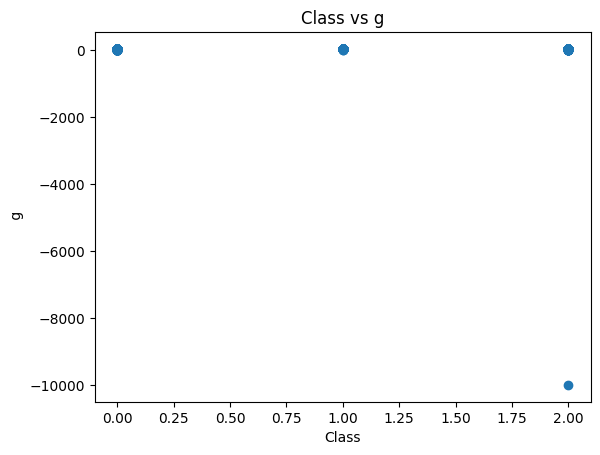

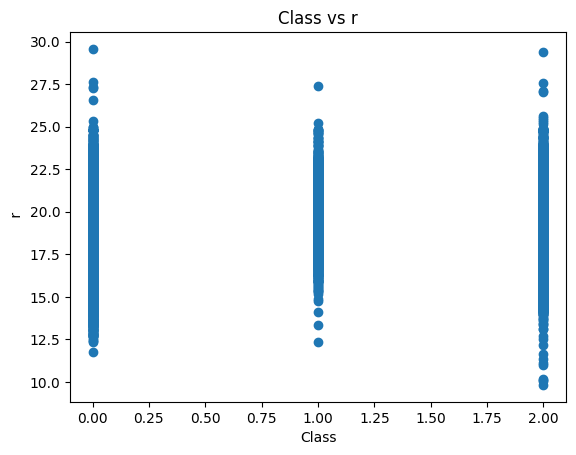

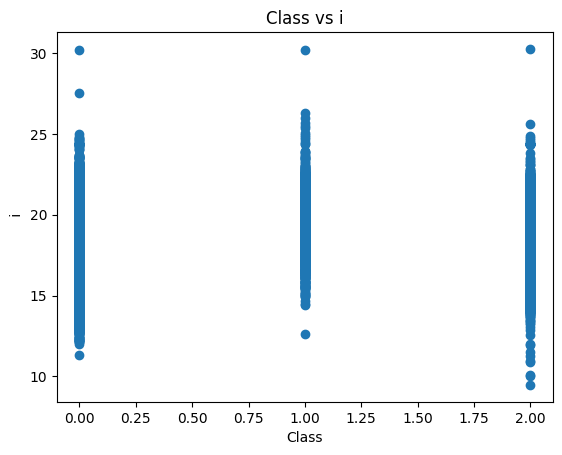

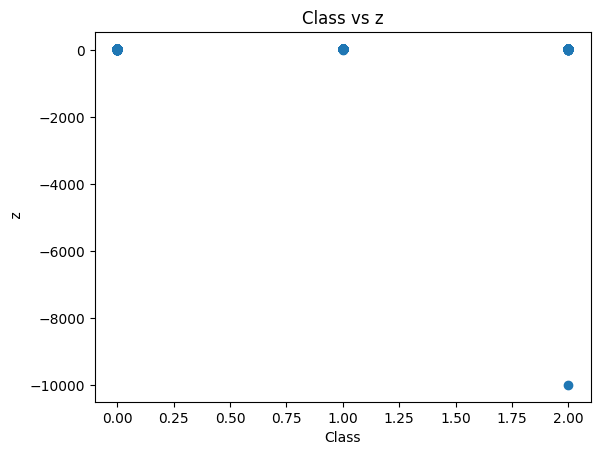

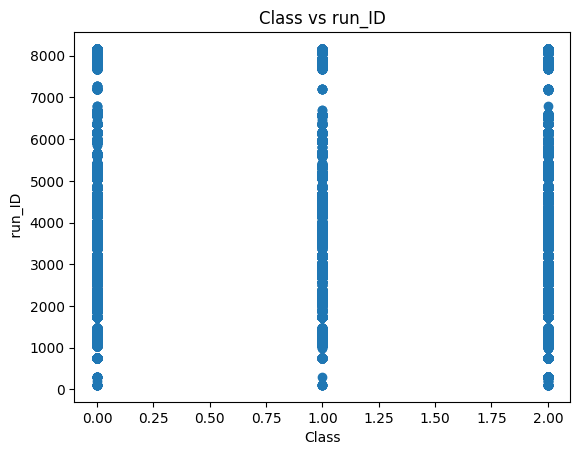

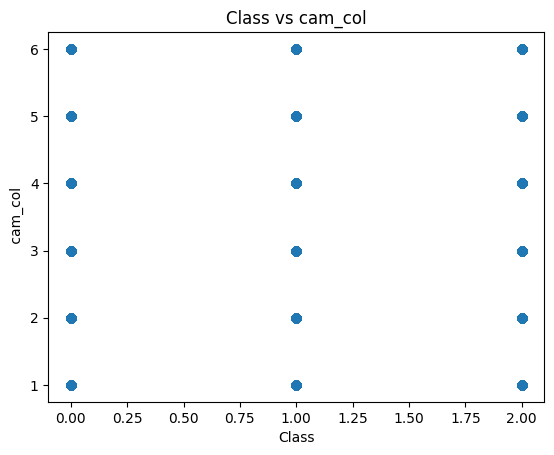

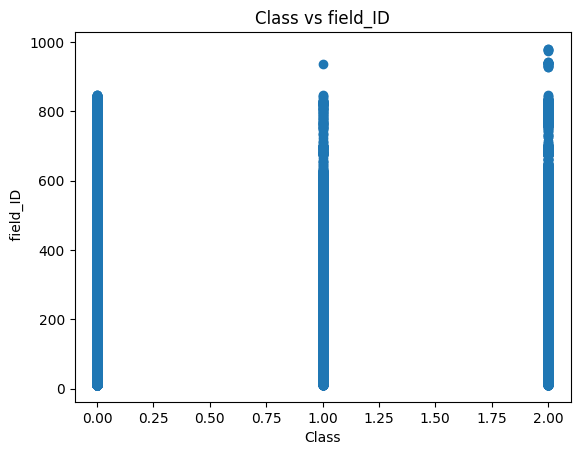

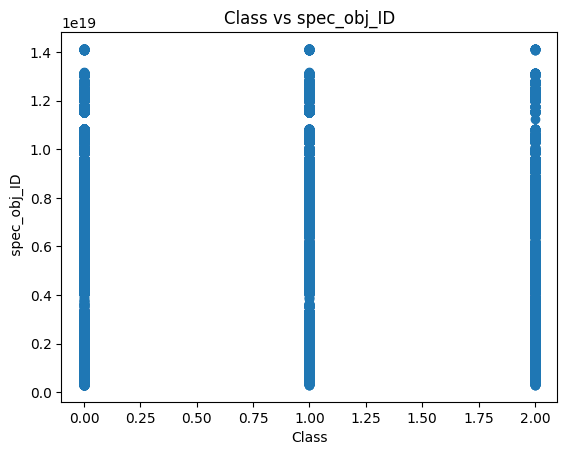

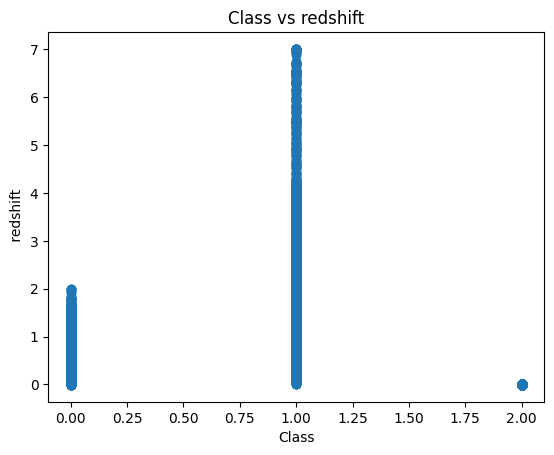

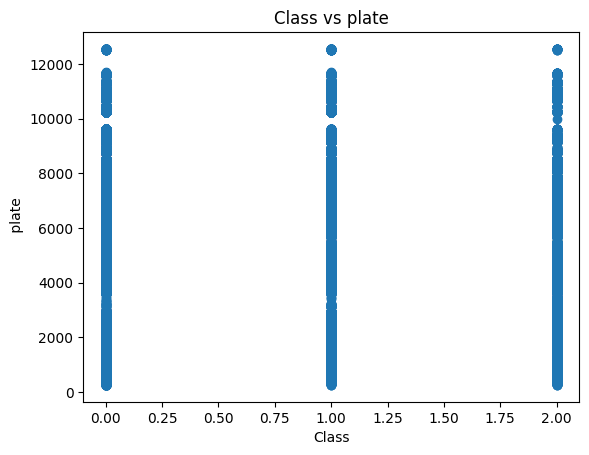

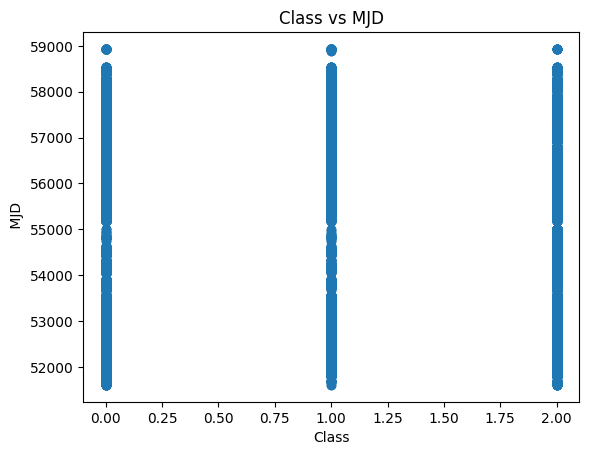

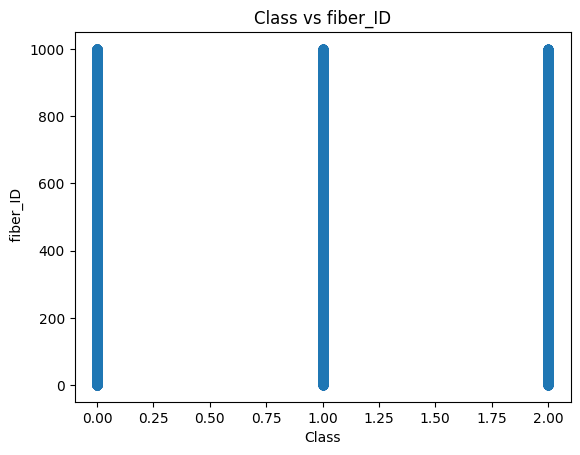

In [ ]:
for i in range(16):
  # Extract the selected column
  x_labels = x_train[:, i]
  y_values = y_train  # Replace this with your 1D array

  # Plot the selected column against the y values
  plt.plot(y_values, x_labels,'o')

  # Add labels and title
  plt.ylabel(f' {features[i]}')
  plt.xlabel('Class')
  plt.title(f'Class vs {features[i]}')

  # Show the plot
  plt.show()








#PCA

In [ ]:
def apply_pca(X, k):

    epsilon = 1e-10

    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)

    std_dev[std_dev == 0] += epsilon #remove any zeros

    standardized_data = (X - mean) / std_dev


    covariance_matrix = np.cov(standardized_data, rowvar=False)


    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)


    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]


    selected_eigenvectors = sorted_eigenvectors[:, :k]


    projection_matrix = selected_eigenvectors


    reduced_data = np.dot(standardized_data, projection_matrix)

    return reduced_data


In [ ]:
# Set the desired dimensionality (k)
k = 10

# Apply PCA to training data
x_train_pca = apply_pca(x_train, k)

# Apply PCA to test data
x_test_pca = apply_pca(x_test, k)

In [ ]:
print(x_train_pca)

[[-0.32139859 -0.03596794  0.76434427 ... -0.28190226  0.07360517
   0.0947778 ]
 [-3.31492054  0.17306315  0.89525543 ...  0.34481959  0.58245847
   0.10152904]
 [ 0.06276735 -0.11315569  0.75037711 ... -0.42010685 -0.19634611
   0.5567896 ]
 ...
 [ 2.87460439 -0.19163219 -0.07907008 ...  0.24348119 -0.10244022
   0.26830624]
 [ 2.54690706 -0.1529407  -0.09749152 ... -0.65607571 -0.68426475
   0.53293255]
 [ 3.78405076 -0.18915853  0.29111491 ...  0.65223722 -0.57000616
  -0.06566422]]


#Least Squares


In [ ]:
from numpy.linalg import inv

X_b = np.c_[np.ones((x_train.shape[0], 1)), x_train]
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

y_pred = X_b @ beta

In [ ]:

accuracy = np.mean(np.trunc(y_pred) == y_train)

print("Acc:",accuracy)


Acc: 0.572975


#Logistic Regression

In [ ]:
import numpy as np

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

def one_hot_encode(y, num_classes):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

def logistic_regression_sgd(X, y, num_classes, learning_rate=0.01, epochs=100):
    num_samples, num_features = X.shape
    weights = np.zeros((num_features, num_classes))
    bias = np.zeros(num_classes)

    for epoch in range(epochs):
        for i in range(num_samples):
            xi = X[i, :].reshape(1, -1)
            yi = one_hot_encode([y[i]], num_classes)

            z = np.dot(xi, weights) + bias
            a = softmax(z)

            error = a - yi

            gradient_weights = np.dot(xi.T, error)
            gradient_bias = error

            weights -= learning_rate * gradient_weights
            bias -= learning_rate * gradient_bias.reshape(-1)

        # Calculate training loss for monitoring
        y_pred = softmax(np.dot(X, weights) + bias)
        loss = cross_entropy_loss(one_hot_encode(y, num_classes), y_pred)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

    return weights, bias


num_classes = 3
learning_rate = 0.01
epochs = 100

weights, bias = logistic_regression_sgd(x_train, y_train, num_classes, learning_rate, epochs)


Epoch 1/100, Loss: 13.99424872580794
Epoch 2/100, Loss: 14.6405555790977
Epoch 3/100, Loss: 14.05037423744967
Epoch 4/100, Loss: 14.024038420448552
Epoch 5/100, Loss: 15.90035744810207
Epoch 6/100, Loss: 14.065053217417509
Epoch 7/100, Loss: 15.02307252767134
Epoch 8/100, Loss: 13.99424872580794
Epoch 9/100, Loss: 13.99424872580794
Epoch 10/100, Loss: 14.402669756677753
Epoch 11/100, Loss: 14.356905877954496
Epoch 12/100, Loss: 14.40785057313699
Epoch 13/100, Loss: 15.63181846163164
Epoch 14/100, Loss: 13.99424872580794
Epoch 15/100, Loss: 15.56619478648131
Epoch 16/100, Loss: 14.637965170868082
Epoch 17/100, Loss: 15.193176001416273
Epoch 18/100, Loss: 14.964788342504928
Epoch 19/100, Loss: 14.549459556356124
Epoch 20/100, Loss: 15.018755180621977
Epoch 21/100, Loss: 14.05037423744967
Epoch 22/100, Loss: 14.453614451860247
Epoch 23/100, Loss: 13.99424872580794
Epoch 24/100, Loss: 14.147514546060355
Epoch 25/100, Loss: 13.99424872580794
Epoch 26/100, Loss: 15.739752137865738
Epoch 27/1

#K nearest neighbors

In [ ]:
from collections import Counter

class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[indices]
            most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common_label)
        return np.array(predictions)


for k in range(10):
  knn_model = KNearestNeighbors(k+1)
  knn_model.fit(x_train, y_train)


  predictions = knn_model.predict(x_test)


  accuracy = np.mean(predictions == y_test)
  print(f"k={k+1} Accuracy: {accuracy}")


k=1 Accuracy: 0.57845
k=2 Accuracy: 0.57845
k=3 Accuracy: 0.61705
k=4 Accuracy: 0.62315
k=5 Accuracy: 0.63405
k=6 Accuracy: 0.6417
k=7 Accuracy: 0.6467
k=8 Accuracy: 0.64905
k=9 Accuracy: 0.6519
k=10 Accuracy: 0.6553


#Naive Bayes

In [ ]:
from scipy.stats import norm

class GaussianNaiveBayes:
    def fit(self, X_train, y_train):
        self.classes, self.class_priors = np.unique(y_train, return_counts=True)
        self.class_priors = self.class_priors / len(y_train)

        self.mean = {}
        self.std = {}

        for c in self.classes:
            class_data = X_train[y_train == c]
            self.mean[c] = np.mean(class_data, axis=0)
            self.std[c] = np.std(class_data, axis=0)

    def predict(self, X_test):
        predictions = []

        for x in X_test:
            class_scores = []

            for c in self.classes:
                prior = np.log(self.class_priors[c])
                likelihood = np.sum(norm.logpdf(x, loc=self.mean[c], scale=self.std[c]))
                posterior = prior + likelihood
                class_scores.append(posterior)

            predicted_class = np.argmax(class_scores)
            predictions.append(predicted_class)

        return np.array(predictions)



nb_model = GaussianNaiveBayes()
nb_model.fit(x_train, y_train)


predictions = nb_model.predict(x_test)


accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.70645


#MLP

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Normalize the data manually
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
X_train_normalized = (x_train - mean) / std
X_test_normalized = (x_test - mean) / std

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_normalized)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_normalized)
y_test_tensor = torch.LongTensor(y_test)

# Split the data into training and validation sets
split = int(0.8 * len(X_train_tensor))
X_train_split, X_val_split = X_train_tensor[:split], X_train_tensor[split:]
y_train_split, y_val_split = y_train_tensor[:split], y_train_tensor[split:]

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_split, y_train_split)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_split, y_val_split)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model, define loss function and optimizer
input_size = x_train.shape[1]
hidden_size1 = 64
hidden_size2 = 32
num_classes = 3

model = MLPModel(input_size, hidden_size1, hidden_size2, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 10

for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validate the model
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_split)
        val_loss = criterion(val_outputs, y_val_split)
        val_accuracy = (torch.argmax(val_outputs, dim=1) == y_val_split).float().mean()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_accuracy.item():.4f}")

# Test the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    test_accuracy = (torch.argmax(test_outputs, dim=1) == y_test_tensor).float().mean()

print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy.item():.4f}")


Epoch 1/10, Loss: 0.0409, Validation Loss: 0.4230, Validation Accuracy: 0.9470
Epoch 2/10, Loss: 0.0580, Validation Loss: 0.4940, Validation Accuracy: 0.9589
Epoch 3/10, Loss: 0.0358, Validation Loss: 0.5284, Validation Accuracy: 0.9625
Epoch 4/10, Loss: 0.1218, Validation Loss: 0.5972, Validation Accuracy: 0.9578
Epoch 5/10, Loss: 0.0493, Validation Loss: 0.5840, Validation Accuracy: 0.9662
Epoch 6/10, Loss: 0.0603, Validation Loss: 0.5726, Validation Accuracy: 0.9667
Epoch 7/10, Loss: 0.1236, Validation Loss: 0.5316, Validation Accuracy: 0.9672
Epoch 8/10, Loss: 0.0427, Validation Loss: 0.5344, Validation Accuracy: 0.9626
Epoch 9/10, Loss: 0.1523, Validation Loss: 0.5248, Validation Accuracy: 0.9582
Epoch 10/10, Loss: 0.1386, Validation Loss: 0.4709, Validation Accuracy: 0.9672
Test Loss: 0.1107, Test Accuracy: 0.9665


#K-means

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim



# Define the K-means model
class KMeans(nn.Module):
    def __init__(self, k, input_size):
        super(KMeans, self).__init__()
        self.centers = nn.Parameter(torch.randn(k, input_size))

    def forward(self, x):
        x = x.unsqueeze(1)
        centers = self.centers.unsqueeze(0)
        distances = torch.norm(x - centers, dim=-1)
        assignments = torch.argmin(distances, dim=1)
        return assignments

# Instantiate the K-means model
kmeans_model = KMeans(k=3, input_size=16)

# Define optimizer
optimizer = optim.SGD(kmeans_model.parameters(), lr=0.01)

# Training the K-means model
epochs = 50

for epoch in range(epochs):
    # Forward pass
    assignments = kmeans_model(X_train_tensor)

    # Update centers
    new_centers = []
    for i in range(3):
        cluster_points = X_train_tensor[assignments == i]
        if len(cluster_points) > 0:
            center = torch.mean(cluster_points, dim=0)
            new_centers.append(center)
    new_centers = torch.stack(new_centers)
    kmeans_model.centers.data = new_centers

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}")

# Get final cluster assignments
final_assignments = kmeans_model(X_train_tensor).numpy()

final_assignments_tensor = torch.LongTensor(final_assignments)

# Print the count of samples in each cluster
print("Cluster Counts:", torch.bincount(final_assignments_tensor))


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Cluster Counts: tensor([18644, 27396, 33960])
